In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df  = pd.read_csv('dataset.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#sorting dependent and indeoendent features !


In [9]:
X = df.drop(labels=['target'] , axis = 1 )
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y  , test_size=0.3 , random_state=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc  = RandomForestClassifier(n_estimators=100 , max_depth=10)

In [13]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [14]:
y_pred = rfc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [16]:
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

0.8461538461538461
0.8113207547169812
0.9148936170212766
0.8600000000000001


In [20]:
f_i = rfc.feature_importances_

In [21]:
f_names = X.columns 

In [22]:
f_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

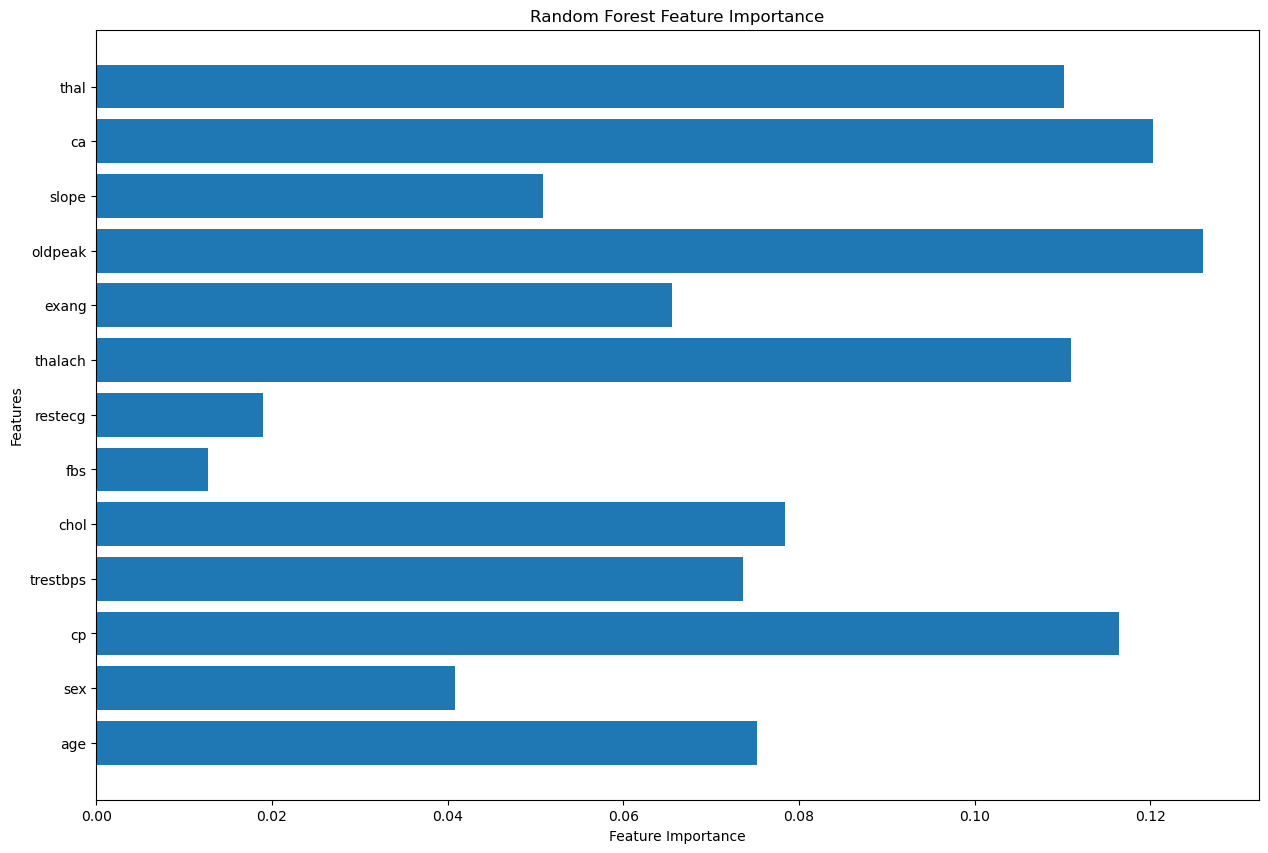

In [20]:
plt.figure(figsize=(15,10))
plt.barh(range(len(f_i)), f_i, align='center')
plt.yticks(np.arange(len(f_i)), f_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# oldpeak , thal , ca , thalach , cp are the top 5 features that are important 

In [21]:
# now we will use hyperparameter tuning to find suitable parameters 
from sklearn.model_selection import RandomizedSearchCV

In [22]:
rfc1 = RandomForestClassifier()

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [24]:
clf = RandomizedSearchCV(rfc1 , scoring='accuracy' , cv = 5 , param_distributions=param_grid , verbose=3)

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.881 total time=   0.4s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.4s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.4s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.881 total tim

In [27]:
clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': None}

In [29]:
rfc2 = RandomForestClassifier(n_estimators= 100 , min_samples_split=5 , min_samples_leaf=4 , max_depth=None)

In [30]:
rfc2.fit(X_train ,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)

In [33]:
y_pred = rfc2.predict(X_test)

In [34]:
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

0.8131868131868132
0.7678571428571429
0.9148936170212766
0.8349514563106796


# the best set of parameters are as follows :

In [35]:
print(clf.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}


# the best score using the hyperparamter tuning is as follows

In [36]:
print(clf.best_score_)

0.8444075304540419


# the default model score is 83% 
